<img src="https://www.upla.cl/normasgraficas/wp-content/uploads/2016/01/logo_upla.png" title="Title text" width="35%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> CIF 8458 Ingeniería del Conocimiento II-2023 </h1>

<H3 align='center'> Tarea 2 - Redes Neuronales y Aprendizaje No supervisado </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Redes Densas Feed Forward
* Regularización y Dropout
* Vanishing Gradient y Skip Connections
* Learn Rate Decay
* Optimizadores
* Aprendizaje No Supervisado


** Formalidades **  
* Se debe realizar un jupyter notebook con los pasos, descripciones, análisis y conclusiones.
* La tarea es individual, la copia parcial o total será penalizada con nota 1.
* La entrega de la tarea se realizará en el sistema <em>eaula </em> (se debe adjuntar el archivo .ipynb).
* Fecha de Entrega: Domingo 6 de Diciembre, 23:00 horas. 
* El sistema no aceptarán tareas con retraso.
* Debe estar preparad@ para presentar su tarea en horario a determinar. 
* La Nota del informe se calcula: $\left(\frac{\mbox{suma de puntos obtenidos}*6}{50}\right)+1$

<hr style="height:2px;border:none"/>

**Uso de google colab**
Se recomienda el uso de google colab para evitar usar los recursos de su computador local.

**Paquetes instalación**
Para poder trabajar en el curso se necesitará instalar librerías para Python, por lo que se recomienda instalarlas a través de anaconda (para Windows y sistemas Unix) en un entorno virtual, donde podrán elegir su versión de Python. Se instalarán librerías como sklearn, una librería simple y de facil acceso para data science, keras en su versión con GPU (para cálculo acelerado a través de la tarjeta gráfica), además de que ésta utiliza como backend TensorFlow o Theano, por lo que habrá que instalar alguno de éstos, además de las librerías básicas de computer science como numpy, matplotlib, pandas, además de claramente jupyter.

Descargar anaconda

Luego de instalar Anaconda y tenerla en el path de su computador crear un entorno virtual:

conda create -n redesneuronales python=version
con version, la version de Python que desea utilizar. Si está en Windows, se recomienda Python 3 (es decir, python = 3) debido a dependencias con una de las librerías a utilizar.

Acceder al ambiente creado

source activate redesneuronales
Instalar los paquetes a utilizar

conda install jupyter sklearn numpy pandas matplotlib keras-gpu tensorflow-gpu
(Si no tienen gpu instalan los paquetes keras y tensorflow en luegar de keras-gpu y tensorflow-gpu)

Para salir del entorno
source deactivate redesneuronales


**Observaciones**
La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo, solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con *comentarios* en celdas _Markdown_, con los comentarios de la pregunta y con cualquier analisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. *No respondan las preguntas en comentarios en el código*.
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará tanto la elección en si. En cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su maquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, incluso con la opción de aceleración con GPU (particularmente útil para los modelos más grandes), esto puede ser relevante para las maquinas más lentas al momento de realizar exploraciones con _K-folds_ o las redes más grandes. 

# 1 - Redes Feed Forward para predecir la resistencia a la compresión del hormigón

De las redes neuronales artificiales más simples se encuentran las redes densas o _Feed Forward_, donde todas las neuronas de una capa estan conectadas a todos los inputs y envian su señal de activación a todas las neuronas de la siguiente capa. Estas redes, si bien son las más simples, suelen tener desempeños bastante buenos, y en muchas aplicaciones reales son utilizadas, ya sea por si solas o en combinación con otros modelos. Además, son las redes donde más facil se pueden observar muchos de los fenómenos que se han descubierto a lo largo de los años de desarrollo de esta area del conocimiento, tanto por ser de las redes vigentes más antiguas y por su estructura relativamente simple. En esta primera parte de la tarea exploraremos las redes densas y algunos de sus hiperparámetros más relevantes como la profundidad, el número de unidades; estudiaremos también algunos métodos de regularización y evidenciaremos el problema del _vanishing gradient_ y el _exploding gradient_, viendo también algunos optimizadores existentes. 

Para realizar esto, utilizaremos una base de datos con información para determinar la resistencia a la compresión del hormigón (material muy importante para la construcciones, más para nosotros que vivimos en una zona sísmica), la cual se encuentra en el repositorio de datos de la Universidad de California, Irvine, en la siguiente URL: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength. El dataset cuenta con 1030 registros, donde podemos encontrar la edad del hormigón y la información de sus ingredientes. 
Nuesta tarea durante esta pregunta será predecir la resistencia a la compresión del hormigón.

<img src="https://civildigital.com/wp-content/uploads/2016/07/Compressive-Strength-test-for-M25-Concrete.jpg" title="Title text" width="35%" height="20%" />

### 1.a Carga de datos y primeros analisis
(1 pto) Cargue los datos en un _dataframe_ como muestra el código. Explore superficialmente los datos utilizando los metodos `.head`, `.describe` o `.info` del _DataFrame_ y comente.

In [ ]:
import pandas as pd

df_tr = pd.read_csv("Concrete_Data.xls")


### 1.b Train Test Split y estandarización
(2 pts) En esta pregunta nos ocuparemos de separar el _dataset_ en los conjuntos de entrenamiento, validación y test y estandarizar los datos. Para esto puede utilizar la librería sklearn, en particular las funciones `StandarScaler` y `train_test_split`.

Para esto separe primero el dataset en $X$ e $Y$. Luego separe los datos considerando un $70\%$ de ellos para entrenamiento, un $20\%$ para validación y un $10\%$ para test. Finalmente ajuste los _scalers_ con los datos de entrenamiento y transforme los datos. 

- ¿Qué operación matemática realiza `StandarScaler` al momento de tranformar los datos? 
- ¿Por qué debemos transformar los datos de validación y de test con el _scaler_ ajustado a los datos de entrenamiento? 
- ¿Qué estamos tratando de representar en esta separación en conjuntos de entrenamiento, validación y test?

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=, random_state=)

scaler_x = StandardScaler()
scaler_x.fit(X_tr)
x_tr = scaler_x.transform(X_tr)
x_val = scaler_x.transform(X_val)

1. Lo que hace StandarScaler es la siguiente formula: Z = (x-μ)/σ 'x' es igual al valor original de la variable que será           escalada, 'μ' es igual a la media de la variable en el conjunto de datos y 'σ' es igual a la desviación estándar de la           variable en el conjunto de datos. esto hace que cada valor de la variable este centrada con un valor cercano a 0 y la           desviación estándar sea 1.
2. Cuando hacemos esto, es importante hacerlo en ambos conjuntos ya que estamos evitando que el modelo sea entrenado de manera     sesgada, también mantenemos la consistencia de los datos y reflejamos la realidad, ya que nosotros no deberíamos tener           acceso a los datos futuros.
3. La idea es simular el rendimiento del modelo en situaciones del mundo real, donde nos encontraremos con datos nuevos que no     formaron parte del proceso de entrenamiento, además, la separación nos ayudara a prevenir el sobreajuste, también el ajuste     de los scalers con los datos de entrenamiento y su aplicación a los conjunto de validación y prueba nos va a garantizar la       consistencia en la transformación de características.


### 1.c Primera Red
(6 pts) En esta pregunta construiremos y entrenaremos una primera red neuronal. Para esto utilizaremos la librería keras que se ocupa de crear, compilar y entrenar los modelos de manera simple. Keras se encargará por lo tanto de crear los modelos y al momento de compilarlos se instanciaran estos en una sesión de TensorFlow. 

Esta primera red será una red de una capa oculta con $256$ neuronas, activación ReLu. Para esta red y todas las demas utilizaremos la función de pérdida _Mean Square Error_ para obtener resultados comparables entre distintos modelos. Para entrenar esta red utilizaremos Gradiente Descendente Estocástico con un _Learn Rate_ de 0.002. Finalmente entrenaremos esta red por unas 20 _epochs_. 

* Construya la red basandose en el código y la documentación de keras. 

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
    
ANN = Sequential()

ANN.add(Dense(256, input_shape=(tu_numero_de_caracteristicas,), activation="relu"))
ANN.add(Dense(150, activation="tanh"))
ANN.add(Dense(1, activation="linear"))

ModuleNotFoundError: No module named 'tensorflow'

Una forma fácil de instanciar la red es la propuesta en el codigo abajo, es decir entrenar la red por 0 _epochs_. Una red instanciada nos permite utilizar el método `.summary` para ver su número de parametros y los tamaños de cada capa. 

* Explique el número de parámetros presentes en esta red, es decir: ¿Cómo a partir de la dimensión del _Input_ y el número de neuronas obtenemos ese número de parámetros?

In [ ]:
ANN.fit(x_tr, y_tr, epochs=0)
ANN.summary()

* Entrene la red por 20 _epochs_, guardando el `history` que retorna el metodo `.fit`.

* Grafique como varian los errores de validación y de entrenamiento a lo largo de las _epochs_. Comente.

In [ ]:
history = model.fit(x_tr, y_tr, epochs=20, validation_data=(x_val,y_val))

* Cree y entrene nuevamente la red, esta vez cambiando el _learn rate_ utilizado para el SGD. Pruebe a lo menos dos valores mayores y dos valores menores al elegido anteriormente. Note que para valores mayores al propuesto puede comenzar a observar fenómeno de divergencia, por lo cual es recomendable agregarle a la red un _calback_, es decir una función que verifica estados y comportamientos de la red mientras se entrena, en particular `TerminateOnNaN`, el cual interrumpirá el proceso de entrenamiento si encuentra un valor NaN. 

* Grafique el comportamiento de los errores de validación y entrenamiento para a lo menos un valor mayor y uno menor al original y comente.

In [ ]:
from tensorflow.keras.callbacks import TerminateOnNaN

# . . . 

history = ANN.fit( # . . .
         callbacks=[TerminateOnNaN]
    )


### 1.d Activación y regularizadores $l$1 $l$2
(4 pts) En esta pregunta se les propone explorar distintas funciones de activación o de regularización usual. Por lo extenso de la tarea se les propone elegir una de las dos exploraciones. En ambos casos deben entrenar la misma red entrenada anteriormente utilizando gradiente descendente con algun _learn rate_ que les parezca adecuado luego de la exploración en la pregunta anterior. 

* En caso de elegir explorar distintas funciones de activación, cambie la activación de la capa oculta sucesivamente por: tangente hiperbólica, _Leaky ReLu_, _softmax_, sigmoidea y lineal. Para esto puede basarse en el código presentado abajo y la documentación de keras. Para la activación _Leaky ReLu_ pruebe cambiar el parámetro de la red. Describa sus resultados y si observa diferencias entre las redes. 

* En caso de elegir explorar las funciones de regularización usual, agregue regularización $l$1 o $l$2 a la capa oculta y pruebe cambiar la tasa de regularización, reportando sus resultados. ¿Qué ocurre si la regularización es muy alta o muy baja? Una vez satisfecho con una tasa de regularización, aplique la regularización a la capa de salida y luego a ambas capas. 

**Independiente de la opción elegida**, comente sobre los siguientes temas:

* ¿Cual es el interés de tener activaciones no lineales? ¿Le parece buena opción la activación sigmoidea para la capa oculta? ¿Qué pasaría si usaramos esta activación en la capa de salida? 

* ¿Cual es la intención de la regularización en general? En particular, ¿Que restricción implicita imponen las regularizaciones $l$1 o $l$2 sobre los pesos de la capa en la cual se aplican? Apoyese de ecuaciones. 

In [ ]:
# activations
from tensorflow.keras.layers import LeakyReLU
model.add(Dense( # . . . ))
model.add(LeakyReLU())
    
# regularizer
from tensorflow.keras.regularizers import l1, l2
model.add(
    Dense( # . . .
          activity_regularizer=l2(0.001)
         )
)

### 1.e Exploración del número de neuronas

(3 pts) Ahora probaremos cambiando el número de neuronas en la capa oculta. Para esto, entrenen la red que estimen conveniente luego de la pregunta anterior, variando el numero de nuronas. Deben explorar a lo menos 10 número de neuronas distintos. Una recomendación sería por ejemplo explorar numero de neuronas en potencias de 2. 

Para cada red entrenada, recuperen el mejor error de validación y el error de entrenamiento en la _epoch_ donde se obtuvo tal error de validación. Grafique como se comportan ambos errores a medida crece el número de neuronas y comente. 

In [ ]:
import numpy as np

train_error, val_error = [], []

for n_units in # . . . 
    
    # do model 
    
    # train model 
    
    val_error = min(history.history['val_loss'])
    train_error = history.history['loss'][np.argmin(history.history['val_loss'])] 
    # for instance
    
# . . . .

### 1.f Dropout
(3 pts) Como seguramente constataron en la pregunta anterior, un número demasiado grande de parámetros en el modelo puede llevarnos a observar el fenomeno de _overfitting_. Una aproximación a este fenómeno que ha dado excelente resultado en redes neuronales es el método _dropout_, donde estocásticamente se desactivan una fracción de las neuronas al momento del entrenamiento, así efectivamente reduciendo el tamaño del modelo que se entrena en cada iteración e implicitamente obteniendo modelos más robustos por el simple hecho que al momento de entrenar nunca se entrena el "mismo" modelo. 

Según lo aprendido en el ramo, ¿en qué consiste el fenómeno de _overfitting_? ¿Por qué modelos más grandes suelen presentar el fenómeno? 

Entrene la mejor red obtenida en la pregunta anterior agregando una capa de _Dropout_ con parámetro $0.5$ inmediatamente luego de la capa oculta. Repita luego el proceso con una red con el doble de neuronas. Note que el agregar una capa _dropout_ hará que la red entrene más lento, por lo cual es recomendable aumentar el numero de _epochs_ para entrenar la red a completitud. 

¿Qué observa al agregar _dropout_? Comente y compare con sus resultados anteriores. 

In [ ]:
from tensorflow.keras.layers import Dropout

# . . . 

model.add(Dropout(0.5))

# . . .

### 1.g Extreme Learning Machine

(2 pts) Otra aproximación para obtener modelos grandes que no sobreajustan es la implementada por _ELM_. Explique en qué consiste la idea de _ELM_ y porqué esto podría evitar sobreajuste a pesar de utilizar modelos con gran número de parámetros. 

Entrene una _ELM_ de una capa fija y una capa oculta, la primera con un número relativamente grande y la segunda con un número relativamente pequeño. Puede utilizar los valores propuestos en el código u otros que le parezcan convenientes. 

Comente sobre el número total de parámetros y el número de parametros entrenables con respecto a los modelos anteriores. ¿Cómo se desempeña la red? ¿El número elevado de parámetros totales implica necesariamente _overfitting_?

In [ ]:
# . . . 

model.add(
    Dense(units=5000,
          activation=relu,
         )
)

model.add(Dense(units=32, activation='relu'))

model.add(Dense(1))

model.layers[0].trainable = False

# . . . 

### 1.h Learning Rate Decay
(3 pts) Ahora entrenaremos un modelo manejando manualmente el _learn rate_. Para esto utilizaremos el _callback_ `LearningRateScheduler`. Este _callback_ nos permitirá implementar una función que maneje el _learn rate_ de nuestro modelo. 

Escriba una función que reciba la epoca actual y retorne un _learn rate_ lr. El lr inicial debe ser igual o mayor a alguno que haya dado buenos resultados en las preguntas anteriores. La función debe dividir por 2 el lr cada 10 _epochs_. Además ponga como restricción que el lr no debe ser menor a $5\times 10^{-5}$, es decir si el valor obtenido es menor a  $5\times 10^{-5}$, la función retorna  $5\times 10^{-5}$.

Entrene su red preferida de las preguntas anteriores con esta modificación, grafique los errores a lo largo del entrenamiento y comente. Según lo visto en el ramo, ¿por qué podría ser util disminuir el _learn rate_ a medida se avanza en el aprendizaje de la red?

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def step_decay(epoch):
    
    
    return lr

schedule = LearningRateScheduler(step_decay)

# model. # . . . 

model.fit(# . . .
        callbacks=[schedule])

### 1.i Vanishing Gradient

(4 pts) El fenómeno del _vanishing gradient_ es el rápido decaimiento del paso de _Backpropagation_ al avanzar por las capas. A lo largo de la tarea solo hemos entrenado capas con una red oculta, de igual forma que la comunidad cientifica realizo por largo tiempo, por el problema del _vanishing gradient_ y por el teorema de aproximación universal que resumidamente demuestra que una red de una sola capa puede aproximar una amplia familia de funciones. 

En esta pregunta entrenaremos una red neuronal profunda sin implementar ninguno de los dispositivos que permiten hoy en día sortear el problema del _vanishing gradient_, para ponerlo en evidencia. Para esto construya una red con 6 capas ocultas, con la siguiente lista de numero de neuronas: $256$ $256$ $128$ $128$ $32$ y $32$, o con valores similares. De tal manera obtendrá un valor de parámetros relativamente comparable a los valores utilizados en las primeras redes. 

Grafique un histograma con los pesos de las 6 capas densas de la red sin entrenar, entrenela a completitud con el método que estime conveniente y luego grafique nuevamente los histogramas para las 6 capas. Comente lo que observa. 

Luego, pruebe cambiar la inizialización de los pesos de la capa densa, puede revisar la documentación de keras para ver las opciones existentes a parte de `glorot_uniform` por defecto. ¿Se logra solucionar el problema? 

Por último, pruebe aumentar la tasa de aprendizaje para ver si logra hacer que el paso de _backpropagation_ alcance las capas que anteriormente no se entrenaban. ¿Qué observa en este caso? 

In [ ]:
# . . .

layer_kernel_weights = model.get_layer(index=i).get_weights()[0]
layer_bias_weight = model.get_layer(index=i).get_weights()[1]
# for one layer
# you can also name your layers and call them by their names if it's less confusing

# . . . 

### 1.j Otros Optimizadores

(3 pts) Finalmente, utilizando la estructura de red que mejor se haya desempeñado a lo largo de la tarea, entrene esta red utilizando un optimizador distinto al gradiente descendente vainilla. Pruebe al menos 2 optimizadores implementados en keras (puede utilizar Adam, AdaGrad, AdaDelta, RMSprop, entre otros) o modificar los parámetros que no hemos utilizado del gradiente descendente (momentum, momentum de Nesterov...).

Note que por las inicializaciones por defecto de los pesos de las capas y la naturaleza de los datos en cuestión, puede ocurrir que para los valores defecto de algunos optimizadores la red diverga en las primeras iteraciones. Para fijar los parámeros de los optimizadores debe importarlos desde `keras.optimizers` y pasar el objeto con los parámetros deseados al método `.compile` de su modelo. En cambio si con los valores usuales basta, algunos optimizadores pueden pasarse como `string` a `.compile`.

Compare como se desempeñan estos optimizadores con la versión utilizada anteriormente, considerando los tiempos de entrenamiento, la velocidad de convergencia y el desempeño final alcanzado. Apoyese de gráficos. 

In [ ]:
# do it yourself

### 1.k Testing 

(4 pts) Finalmente, luego de entrenar todos estos modelos estamos en condiciones de probar que tan bien fue nuestro desempeño. Para esto utilice el modelo en el cual obtuvo el mejor desempeño en validación y calcule el error cuadrático medio de la predicción realizada sobre el _Test set_. Para puede utilizar el metodo `.predict` de su modelo. 

¿Qué tan bien se desempeñaría su modelo en un caso real en vista de lo anterior? Si su curiosidad es suficiente, puede calcular el error real de su modelo transformando nuevamente el _target_ y su predicción a la escala original (utilizando su `scaler`) y tranformando a precio aplicando exponenciación (pues Y estaba espresado en escala logaritmica).

 <a id="segundo"></a>
# 2. Clasificando granos de trigo usando Aprendizaje No Supervisado

En esta sección utilizaremos el dataset Seeds que contiene información de mediciones de propiedades geométricas de granos de trigo pertenecientes a tres variedades: Kama, Rosa y Canadian. Para estudiar la estructura interna del grano se utilizó una técnica de rayos X de baja energía. Para ver en detalle la descripción de la semántica asociada a los atributos de este problema, puede consultar https://archive.ics.uci.edu/ml/datasets/seeds.


<img src="https://5.imimg.com/data5/SELLER/Default/2022/3/AB/OR/QY/24572573/raw-wheat-seeds-500x500.jpg" title="Title text" width="40%"/>

### 2.a) Carga de Datos

(1 pto) Construya un dataframe con los datos a analizar. 

In [2]:
import pandas as pd

url = 'seeds_dataset.csv'
df = pd.read_csv(url, sep=',',header=None, names=['AREA', 'PER', 'COMP', 'LEN', 'WID', 'ASYM', 'LGR','CLASS'])

En el DataFrame, están las variables, las cuales son las siguientes:

Area: se asumiría que esta es el área del grano.

PER: Se asumiría como el perímetro del grano.

COMP: Se podría asumir que es que tan compacto es el grano.

LEN: Se asume como longitud.

WID: Se asume como ancho o grosor.

ASYM: Se asume como simetría.

LGR: Se asume como longitud del surco del grano.

CLASS: Es la etiqueta que se le dará como clasificación al grano.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AREA    210 non-null    float64
 1   PER     210 non-null    float64
 2   COMP    210 non-null    float64
 3   LEN     210 non-null    float64
 4   WID     210 non-null    float64
 5   ASYM    210 non-null    float64
 6   LGR     210 non-null    float64
 7   CLASS   210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


AREA: Tipo de dato float donde no puede ser nulo.

PER: Tipo de dato float donde no puede ser nulo.

COMP: Tipo de dato float el cual no puede ser nulo.

LEN: Tipo de dato float no nulo.

WID: Tipo de dato float no nulo.

ASYM: Tipo de dato float no nulo.

CLASS: Tipo de dato int el cual no puede ser nulo.

In [4]:
df.describe()

,AREA,PER,COMP,LEN,WID,ASYM,LGR,CLASS
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


Tenemos 210 datos en cada uno de las variables.

El promedio es de 14.8 en el AREA, 14.5 en PER, en comp el promedio es de 0.87, en LEN es de 5.62, en WID es de 3.2, en ASYM es de 3.7, en LGR es de 5.4 y en CLASS.

El dato de menor valor en AREA es de 10.590, en PER es de 12.41, en COMP es de 0.808, LEN es de 4.89, en WID es de 2.63, ASYM es de 0.765, en LGR es de 4.51

El dato de mayor valor en cada variable es de: AREA: 21.180, PER: 17.250, COMP: 0.918, LEN: 6.675, WID: 4.033, ASYM: 8.456, LGR: 6.55

En el percentil 1(25%) tenemos que los datos son menores a en las variables: AREA: 12.270, PER: 13.450, COMP: 0.856, LEN: 5.262, WID: 2.944, ASYM: 2.561, LGR: 5.045, esto significa que los datos son inferiores a los indicados en cada variable.

In [7]:
df.shape

(210, 8)

Con data Shape obtendremos la información de cuantas filas y columnas tenemos en nuestro DataFrame.

### 2.b) Preprocesamiento

(2 pts) Normalice los datos antes de trabajar. ¿Es necesario separar  los datos en entrenamiento y test?


In [8]:
from sklearn.preprocessing import StandardScaler

targets = df['CLASS']
features = df.drop('CLASS', axis=1)


scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

En este caso no es necesario separar los datos en entrenamiento y test, esto debido a que los algoritmos que usaremos en esta tarea (K-Means y mezcla de Gaussianas), no necesitan dividir los datos, ya que estos algoritmos se basan en la estructura interna de los datos para generar los clusters y no necesitan etiquetas para entrenar o evaluar el modelo.

### 2.c) Clustering

(2 pts) Clusterice los datos usando K-means, con el objetivo de clasificar el tipo de grano.

In [9]:
from sklearn.cluster import KMeans

datos = features

cluster_d = 3  

kmeans = KMeans(n_clusters= cluster_d, random_state=0)

clusters = kmeans.fit_predict(datos)

C:\Users\claud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\claud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 2.d) Etiquetados vía clustering

(2 pts) Etiquete cada cluster con la etiqueta correspondiente. Explique que hace el siguiente código.


In [11]:
from scipy.stats import mode
import numpy as np

labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(targets[mask])[0]

    
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1
 2 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 1 1 1 1 1 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3]


El código asigna un etiqueta a cada cluster generado anteriormente, la etiqueta que se asigna depende de la moda que tenga cada cluster.

### 2.e) Cálculo del desempeño

(2 pts) Calcule el accuracy de la clasificación

In [12]:
from sklearn.metrics import accuracy_score

# Calcula la precisión comparando las etiquetas originales con las etiquetas asignadas por KMeans
accuracy = accuracy_score(targets, labels)

# Imprime la precisión
print(f"Precisión: {accuracy:.2%}")

Precisión: 89.52%


### 2.f) Matriz de confusión

(2 pts) Muestre la matriz de confusión. Comente

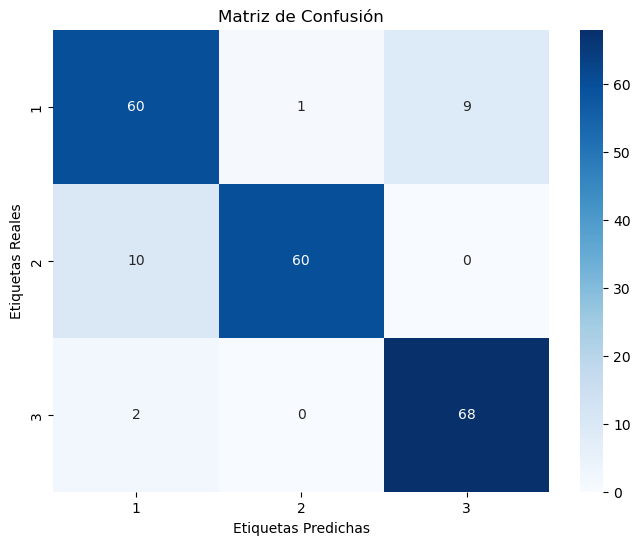

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(targets, labels)

# Muestra la matriz de confusión usando seaborn y matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.show()


En este caso nuestro algoritmo trabaja de manera positiva, esto debido a que la matriz de confusión nos muestra que en etiquetar los granos del 3r tipo tiene muy pocos errores, siendo de manera contraria en las etiquetas 2 y 1, donde tiene la mayor cantidad de errores.

### 2.g) Mezcla de Gaussianas

(2 pts) Clusterice los datos usando Mezcla de gaussianas, con el objetivo de clasificar el tipo de grano. Repita los pasos d) al g) usando este algoritmo. Compare con k-means y comente.


In [14]:
from sklearn.mixture import GaussianMixture

datos2 = df_scaled[['AREA', 'PER', 'COMP', 'LEN', 'WID', 'ASYM', 'LGR']]

cluster2 = 3

gmm = GaussianMixture(n_components= cluster2, random_state=0)
clusters = gmm.fit_predict(datos)

C:\Users\claud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
labels = np.zeros_like(clusters)
for i in range(cluster2):
    mask = (clusters == i)
    labels[mask] = mode(targets[mask])[0]

print(labels)

[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 1 1 1 1 1 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 1 1 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3]


In [16]:
accuracy = accuracy_score(targets, labels)
print(f"Precisión: {accuracy:.2%}")

Precisión: 92.86%


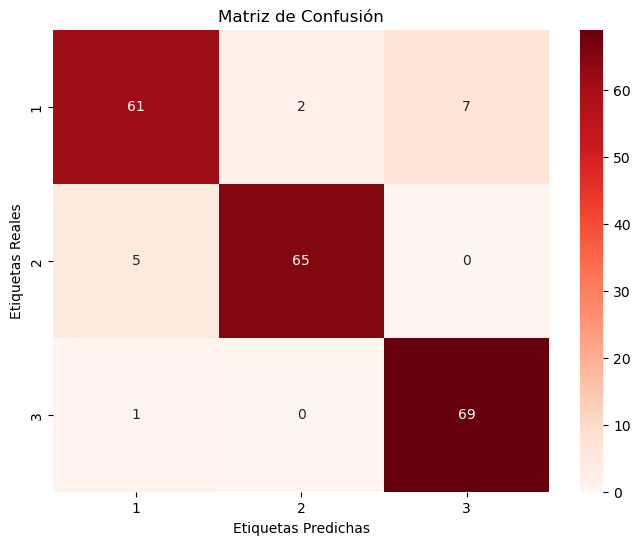

In [17]:
conf_matrix = confusion_matrix(targets, labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.show()

La matriz de confusión en este caso nos muestra nuevamente que el algoritmos trabaja de mejor manera con la etiqueta 3 que con la etiqueta 2 y 1, pero en este caso en concreto el algoritmo trabaja de mejor manera con la etiqueta 2 a diferencia del anterior, ya que tiene más aciertos que el algoritmo K-Means.

### 2.i) Manifold

(2 pts) Proyecte los datos usando el método de manifold TSNE. Compare k-means y mezcla de gaussianas usando esta proyección. ¿La proyección mejora los resultados?
Comente.

In [18]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Proyección t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(df_scaled)

In [19]:
datos1 = X_tsne

cluster_de = 3  

kmeans = KMeans(n_clusters= cluster_de, random_state=0)

clusters = kmeans.fit_predict(X_tsne)

C:\Users\claud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\claud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(targets[mask])[0]

    
print(labels)

[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1
 2 1 3 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 3 1 1 1 1 1 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 3 3 3 3]


In [21]:
accuracy = accuracy_score(targets, labels)

print(f"Precisión: {accuracy:.2%}")

Precisión: 91.43%


## AQUI EMPIEZA TSNE GAUSSIAN

In [22]:
datos3 = X_tsne

cluster3 = 3
gmm = GaussianMixture(n_components= cluster3, random_state=0)
clusters = gmm.fit_predict(X_tsne)
print(clusters)

[2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2
 0 2 1 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 2 2 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1]


C:\Users\claud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
labels = np.zeros_like(clusters)
for i in range(cluster3):
    mask = (clusters == i)
    labels[mask] = mode(targets[mask])[0]

print(labels)

[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1
 2 1 3 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 3 3 1 1 3 1 1 1 1 1 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 3 3 3 3]


In [24]:
accuracy = accuracy_score(targets, labels)
print(f"Precisión: {accuracy:.2%}")

Precisión: 90.95%


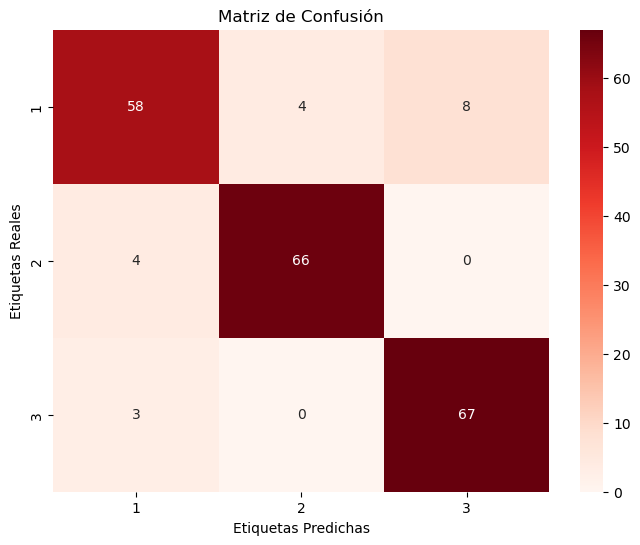

In [25]:
conf_matrix = confusion_matrix(targets, labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.show()

Como conclusión, el K-Means es un poco superior en el caso de TSNE donde el K-Means del TSNE da un resultado mejor, mientras que el Gaussian normal da un mejor resultado que el TSNE con este mismo método, por lo que no podríamos concluir algo de manera correcta, sin hacer más pruebas.